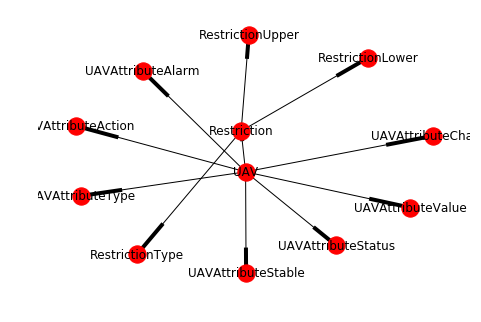

In [1]:
import networkx
import matplotlib.pyplot as plt
from pprint import pprint

#Create Graph
testGraph = networkx.MultiDiGraph()
testGraph.add_node('UAV', value = 'UAV')
testGraph.add_node('UAVAttributeType', value = 'course|speed|altitude|flaps|gear|fuel')
testGraph.add_node('UAVAttributeValue', value = '<number>|unknown')
testGraph.add_node('UAVAttributeStatus', value = 'up|down|unknown')
testGraph.add_node('UAVAttributeAlarm', value = 'ok|warning|alarm')
testGraph.add_node('UAVAttributeStable', value = 'true|false|unknown')
testGraph.add_node('UAVAttributeChange', value = 'increase|decrease|stop')
testGraph.add_node('UAVAttributeAction', value = 'move|climb|descend|speed_up|slow_down')
testGraph.add_edge('UAV', 'UAVAttributeType', value = 'UAVhasType')
testGraph.add_edge('UAV', 'UAVAttributeValue', value = 'UAVhasValue')
testGraph.add_edge('UAV', 'UAVAttributeStatus', value = 'UAVhasStatus')
testGraph.add_edge('UAV', 'UAVAttributeAlarm', value = 'UAVhasAlarm')
testGraph.add_edge('UAV', 'UAVAttributeStable', value = 'UAVhasStable')
testGraph.add_edge('UAV', 'UAVAttributeChange', value = 'UAVhasChange')
testGraph.add_edge('UAV', 'UAVAttributeAction', value = 'UAVhasAction')

testGraph.add_node('Restriction', value='Restriction')
testGraph.add_node('RestrictionUpper', value='<number>|none|unknown')
testGraph.add_node('RestrictionLower', value='<number>|none|unknown')
testGraph.add_node('RestrictionType', value='altitude|speed|photo')
testGraph.add_edge('Restriction', 'RestrictionUpper', value='RestrictionHasUpper')
testGraph.add_edge('Restriction', 'RestrictionLower', value='RestrictionHasLower')
testGraph.add_edge('Restriction', 'RestrictionType', value='RestrictionHasType')

testGraph.add_edge('UAV', 'Restriction', value='hasRestriction')

#Draw Graph
networkx.draw(testGraph, with_labels=True)
plt.show()

In [2]:
def getNyms(anchorWords, checkWordList):
    #Iterate through all words to check
    for currentWord in checkWordList:
        synonyms = []
        hypernyms = []
        hyponyms = []
        deriv = []
        #print(currentWord)
        #print(checkWordList[currentWord])
        #Get synsets of current word to check
        testWord = wordnet.synsets(currentWord)
        #for each synset (meaning)
        for syn in testWord:
            #Get Hypernyms
            if(len(syn.hypernyms()) > 0):
                currentHypernyms = syn.hypernyms()
                for hyperSyn in currentHypernyms:
                    for lemma in hyperSyn.lemmas():
                        #if(lemma.name() != currentWord):
                        hypernyms.append(lemma.name())
                    #hypernyms.append(hyperSyn.lemma_names())
            #Get Hyponyms
            if(len(syn.hyponyms()) > 0):
                currentHyponyms = syn.hyponyms()
                for hypoSyn in currentHyponyms:
                    for lemma in hypoSyn.lemmas():
                        #if(lemma.name() != currentWord):
                        hyponyms.append(lemma.name())
                    #hypernyms.append(hyperSyn.lemma_names())
            #Get direct synonyms
            for lemma in syn.lemmas():
                #if(lemma.name() != currentWord):
                synonyms.append(lemma.name())
                #Get derivationally related forms
                for derivForm in lemma.derivationally_related_forms():
                    if(derivForm.name() not in deriv):
                        deriv.append(derivForm.name())
        #print("SYNONYMS: ")
        #print(set(synonyms))
        #print('\n HYPERNYMS:')
        #print(set(hypernyms))
        #print('\n HYPONYMS:')
        #print(set(hyponyms))
        #print('\n DERIVATIONALLY RELATED FORMS:')
        #print(set(deriv))
        #Check if any target words found in syno/hyper/hypo lists
        #If target word is found, increase the number of times found in the dictionary.
        for targetWord in anchorWords:
            if targetWord in set(synonyms):
                anchorWords[targetWord].append(currentWord)
            elif targetWord in set(hypernyms):
                anchorWords[targetWord].append(currentWord)
            elif targetWord in set(hyponyms):
                anchorWords[targetWord].append(currentWord)
            elif targetWord in set(deriv):
                anchorWords[targetWord].append(currentWord)
    return (synonyms, hypernyms, hyponyms, deriv)

In [3]:
def findAnchors(wordToFind):
    #Define vars
    anchorNodeValues = []
    #Get list of nodes from graph
    nodeList =  testGraph.nodes.data()
    #nodeList = list(networkx.dfs_preorder_nodes(testGraph, source='UAV'))
    #print(nodeList)
    #iterate through nodes
    for node, values in nodeList:
        #Get the value of each node
        currentNodeValue = values['value']
        #If the word we are looking for is in a node's value
        if(wordToFind in currentNodeValue):
            #print the node and its value
            #print(node, currentNodeValue)
            #Get the node's neighbors
            neighborNodes = list(networkx.all_neighbors(testGraph, node))
            #for each neighbor, append its value to the anchor node values
            for neighbor in neighborNodes:
                neighborNodeValue = testGraph.node[neighbor]['value']
                anchorNodeValues.append(neighborNodeValue.lower())
        else:
            nodeValueList = currentNodeValue.split('|')
            for value in nodeValueList:
                anchorNodeValues.append(value)
    #print(anchorNodeValues)
    return anchorNodeValues

In [40]:
def findPoSAnchors(checkWordList):
    #Define vars
    nounAnchorNodeValues = []
    verbAnchorNodeValues = {}
    #Get list of nodes from graph
    nodeList =  testGraph.nodes.data()
    #nodeList = list(networkx.dfs_preorder_nodes(testGraph, source='UAV'))
    #print(nodeList)
    #iterate through nodes
    for wordToFind in checkWordList:
        tag = checkWordList[wordToFind]
        if(tag != 'VERB'):
            for node, values in nodeList:
                #Get the value of each node
                currentNodeValue = values['value']
                #If the word we are looking for is in a node's value
                if(wordToFind in currentNodeValue):
                    #print the node and its value
                    #print(node, currentNodeValue)
                    #Get the node's neighbors
                    neighborNodes = list(networkx.all_neighbors(testGraph, node))
                    #for each neighbor, append its value to the anchor node values
                    for neighbor in neighborNodes:
                        neighborNodeValue = testGraph.node[neighbor]['value']
                        nounAnchorNodeValues.append(neighborNodeValue.lower())
                else:
                    nodeValueList = currentNodeValue.split('|')
                    for value in nodeValueList:
                        nounAnchorNodeValues.append(value)
            if(tag == 'VERB'):
                #Get the value of each node
                currentNodeValue = values['value']
                #If the word we are looking for is in a node's value
                if(wordToFind in currentNodeValue):
                    #print the node and its value
                    #print(node, currentNodeValue)
                    #Get the node's neighbors
                    neighborNodes = list(networkx.all_neighbors(testGraph, node))
                    #for each neighbor, append its value to the anchor node values
                    for neighbor in neighborNodes:
                        neighborNodeValue = testGraph.node[neighbor]['value']
                        verbAnchorNodeValues.append({neighborNodeValue.lower(): wordToFind})
                else:
                    nodeValueList = currentNodeValue.split('|')
                    for value in nodeValueList:
                        verbAnchorNodeValues.append({value: wordToFind})
    #print(anchorNodeValues)
    return nounAnchorNodeValues, verbAnchorNodeValues

In [52]:
'''def PoSTag(partsOfInterest, wordList):
    #FORCE 'MOVE' TO RETRUN AS A VERB - HARDCODED FOR TESTING BECAUSE TAGGER RETURNS NOUN
    anchorWords = {}
    checkWordList = {}
    verbFound = False
    #Tag each word with a part of speech (using the universal tagging system for more general tags)
    tagged = pos_tag(wordList, tagset='universal', lang='eng')
    #tagged = pos_tag(wordList)
    #Go through each word and find if it's a part of speech we are interested in
    for tagPair in tagged:
        #get word and tag
        word = tagPair[0]
        tag = tagPair[1]
        #If interesting part of speech, then append to list of words to check
        print(word, tag)
        if(word != 'move'):
            if tag in set(partsOfInterest):
                checkWordList.update({word: tag})
                if tag == 'VERB':
                    verbFound = True
        else:
            checkWordList.update({word: 'VERB'})
            verbFound = True

    return checkWordList, anchorWords, verbFound'''

In [20]:
import spacy
from spacy import displacy
def PoSTag(wordList):
    sp = spacy.load('en')
    #FORCE 'MOVE' TO RETRUN AS A VERB - HARDCODED FOR TESTING BECAUSE TAGGER RETURNS NOUN
    anchorWords = {}
    checkWordList = {}
    tagged = {}
    verbFound = False
    #Tag each word with a part of speech (using the universal tagging system for more general tags)
    for word in sentence:
        tagged.update({word: word.pos_})
        #print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')    
        #tagged = pos_tag(wordList)
    #Go through each word and find if it's a part of speech we are interested in
    print(tagged)
    for word in tagged:
        #get word and tag
        tag = tagged[word]
        #If interesting part of speech, then append to list of words to check
        print(word, tag)
        #if(word != 'move'):
        #if tag in set(partsOfInterest):
        checkWordList.update({word: tag})
        #    if tag == 'VERB':
        #       verbFound = True
        #else:
        #   checkWordList.update({word: 'VERB'})
        #  verbFound = True

    return checkWordList, anchorWords, verbFound

In [23]:
import spacy
from spacy import displacy
sp = spacy.load('en')
from nltk.tokenize import word_tokenize

#sentence = sp(u"There are no limits on airspeed or altitude over the objective")
#sentence = sp("Move faster")
inputCommand = input("Please enter a command\n")
inputCommand = inputCommand.lower()
#Tokenize the input command
#wordList = word_tokenize(inputCommand)
sentence = sp(inputCommand)
checkWordList = {}

#PoSTag word list and get anchor words and important words to check back
checkWordList, anchorWords, verbFound = PoSTag(sentence)
#displacy.render(sentence, style='dep', jupyter=True, options={'distance': 85})

Please enter a command
There is no limit on airspeed or altitude over the waypoint.
{there: 'ADV', is: 'VERB', no: 'DET', limit: 'NOUN', on: 'ADP', airspeed: 'NUM', or: 'CCONJ', altitude: 'NOUN', over: 'ADP', the: 'DET', waypoint: 'NOUN', .: 'PUNCT'}
there ADV
is VERB
no DET
limit NOUN
on ADP
airspeed NUM
or CCONJ
altitude NOUN
over ADP
the DET
waypoint NOUN
. PUNCT


In [ ]:
from nltk.corpus import wordnet, verbnet, framenet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
#import nltk 
#from nltk.tag.stanford import StanfordTagger
#print(verbnet.classids(lemma='go'))
#_path_to_model = 'E:/nltk_data/stanford-postagger-2015-04-20/models/english-bidirectional-distsim.tagger'
#_path_to_jar = 'E:/nltk_data/stanford-postagger-2015-04-20/stanford-postagger.jar'
#tagger = StanfordTagger(path_to_model=_path_to_model)
goFrames = framenet.lus(r'^go.v\b')
partsOfInterest = ['VERB']
for frame in goFrames:
    definitionTokens = word_tokenize(frame.definition)
    definitionTokens = definitionTokens[2:]
    print(definitionTokens)
    taggedDefinition = PoSTag(partsOfInterest, definitionTokens)
    print(taggedDefinition)

In [69]:
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import re
from builtins import any as b_any

#ignoredWords = ['the', 'a', 'at']

#define the noun that we have that already exists
meantWords = {}
partsOfInterest = ['VERB', 'NOUN']
#Define the input command
#inputCommand = "Find the objective at the point with the target"
#inputCommand = "There are no limits on airspeed or altitude"
#inputCommand = "Bring me six green peppers from Meijer"
#inputCommand = "The first place is LVN.  It is a target.  The airspeed constraint is 200 and the altitude limit is 1500.  The effective radius is 2.5"
#inputCommand = "The first waypoint is LVN.  It is a target.  The airspeed restriction is 200 and the altitude restriction is 1500.  The effective radius is 2.5"
#inputCommand = "What is our current airspeed?"
#inputCommand = "Go to the next location"
#inputCommand = "Go faster"
inputCommand = input("Please enter a command\n")
inputCommand = inputCommand.lower()
#Tokenize the input command
wordList = word_tokenize(inputCommand)
checkWordList = {}

#PoSTag word list and get anchor words and important words to check back
checkWordList, anchorWords, verbFound = PoSTag(partsOfInterest, wordList)

#if(verbFound == False):
for word in checkWordList:
    anchorsFound = findAnchors(word)
    for anchor in anchorsFound:
        #print(anchor)
        if anchor not in anchorWords:
            anchorWords[anchor] = []
'''else:
    nounAnchorNodeValues, verbAnchorNodeValues = findPoSAnchors(checkWordList)
    for anchor in nounAnchorNodeValues:
        if anchor not in anchorWords:
            anchorWords[anchor] = []
    for anchor, originalWord in verbAnchorNodeValues:
        if anchor not in anchorWords:
            anchorWords[anchor] = []
print (anchorWords)'''

#Get syno/hyper/hyponyms and derivationally related forms
synonyms, hypernyms, hyponyms, deriv = getNyms(anchorWords, checkWordList)

#Iterate through all targetWord key-value pairs
#for targetWord in anchorWords:
for anchorWord in anchorWords:
    endSearch = False
    #print(anchorWord)
    #print(anchorWords[anchorWord])
    for originalWord in anchorWords[anchorWord]:
        if(endSearch == False):
            #Ignore if the found word is the target word itself
            if(originalWord != anchorWord):
                answered = False
                #Check if one of the found words is correct
                answer = input("When you said " + originalWord + ", did you mean " + anchorWord + "?\n")
                while(answered == False):
                    if(answer == 'yes'):
                        answered = True
                        endSearch = True
                        meantWords[originalWord] = anchorWord
                    elif(answer == 'no'):
                        answered = True
                    else:
                        answer = input("Please answer yes or no\n")
                        answered = False

#Set up a list for the words which were replaced                        
print(meantWords.items())
meantInput = []
for word in wordList:
    meantInput.append(word)

    
#ADDED
'''verbObjects = {}
if (verbFound == True):
    
    for word in meantWords:
        meantWord = meantWords[word]
        checkWordList, anchorWords, verbFound = PoSTag(partsOfInterest, word_tokenize(meantWord))
        if(checkWordList[meantWord] == 'VERB'):
             #Get list of nodes from graph
            nodeList =  testGraph.nodes.data()
            #iterate through nodes
            for node, values in nodeList:
                #Get the value of each node
                currentNodeValue = values['value']
                #If the word we are looking for is in a node's value
                if(meantWord in currentNodeValue):
                    #Get the node's neighbors
                    neighborNodes = list(networkx.all_neighbors(testGraph, node))
                    #for each neighbor, append its value to the anchor node values
                    for neighbor in neighborNodes:
                        neighborNodeValue = testGraph.node[neighbor]['value']
                        verbObjects.update({meantWord: neighborNodeValue.lower()})
print (verbObjects)'''

#Replace the initial words with the found words
for index, word in enumerate(meantInput):
    for meantWordKey, meantWordValue in meantWords.items():
        #print(word, meantWordKey, meantWordValue)
        if(word == meantWordKey):
            meantInput[index] = meantWordValue

#Put together a potential string that means the same and output it for confirmation
meantInputString = ' '.join(meantInput)
#if(verbFound == False):
print("You gave the following information: \n")
print(inputCommand)
print("Is this equivalent to the following?\n")
print(meantInputString)

'''
#VERY SHAKY WAY TO RECONSTRUCT SENTENCE
if(verbFound == True):
    print("You gave the following instruction: \n")
    print(inputCommand)
    verbAction, verbObject = verbObjects.popitem()
    print("Were you requesting for the " + verbObject + " to " + meantInputString + "?\n")
    print(meantInputString)
'''
    
#correctSolution = input("Please answer yes or no\n")

Please enter a command
go faster
go VERB
faster ADV
When you said go, did you mean speed?
no
When you said go, did you mean stop?
no
When you said go, did you mean move?
yes
When you said go, did you mean descend?
no
dict_items([('go', 'move')])
You gave the following information: 

go faster
Is this equivalent to the following?

move faster


'\n#VERY SHAKY WAY TO RECONSTRUCT SENTENCE\nif(verbFound == True):\n    print("You gave the following instruction: \n")\n    print(inputCommand)\n    verbAction, verbObject = verbObjects.popitem()\n    print("Were you requesting for the " + verbObject + " to " + meantInputString + "?\n")\n    print(meantInputString)\n'

In [62]:
from nltk.corpus import wordnet, verbnet
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import re
#ignoredWords = ['the', 'a', 'at']

#define the noun that we have that already exists
targetWords = {"target": [], "locate": [], "unrelated": []}
meantWords = {}
#targetWords = {"waypoint": 0, "restriction": 0}
partsOfInterest = ['VERB', 'NOUN', 'ADV']
#Define the input command
#inputCommand = "Find the objective at the point with the target"
#inputCommand = "Bring me six green peppers from Meijer"
#inputCommand = "The first place is LVN.  It is a target.  The airspeed constraint is 200 and the altitude limit is 1500.  The effective radius is 2.5"
#inputCommand = "The first waypoint is LVN.  It is a target.  The airspeed restriction is 200 and the altitude restriction is 1500.  The effective radius is 2.5"
#inputCommand = "What is our current airspeed?"
#inputCommand = "go faster"
inputCommand = input("Please enter a command\n")
inputCommand = inputCommand.lower()
#Tokenize the input command
wordList = word_tokenize(inputCommand)
checkWordList = {}

#Tag each word with a part of speech (using the universal tagging system for more general tags)
tagged = pos_tag(wordList, tagset='universal', lang='eng')
#tagged = pos_tag(wordList)
#Go through each word and find if it's a part of speech we are interested in
for tagPair in tagged:
    #get word and tag
    word = tagPair[0]
    tag = tagPair[1]
    #If interesting part of speech, then append to list of words to check
    if tag in set(partsOfInterest):
        checkWordList.update({word: tag})
    #print (word)
    #print(tag)


#Iterate through all words to check
for currentWord in checkWordList:
    synonyms = []
    hypernyms = []
    hyponyms = []
    pertainyms = []
    deriv = []
    print(currentWord)
    print(checkWordList[currentWord])
    #Get synsets of current word to check
    testWord = wordnet.synsets(currentWord)
    #for each synset (meaning)
    for syn in testWord:
        #Get Hypernyms
        if(len(syn.hypernyms()) > 0):
            currentHypernyms = syn.hypernyms()
            for hyperSyn in currentHypernyms:
                for lemma in hyperSyn.lemmas():
                    #if(lemma.name() != currentWord):
                    hypernyms.append(lemma.name())
                #hypernyms.append(hyperSyn.lemma_names())
        #Get Hyponyms
        if(len(syn.hyponyms()) > 0):
            currentHyponyms = syn.hyponyms()
            for hypoSyn in currentHyponyms:
                for lemma in hypoSyn.lemmas():
                    #if(lemma.name() != currentWord):
                    hyponyms.append(lemma.name())
                #hypernyms.append(hyperSyn.lemma_names())
        #Get direct synonyms
        for lemma in syn.lemmas():
            #if(lemma.name() != currentWord):
            synonyms.append(lemma.name())
            for derivForm in lemma.derivationally_related_forms():
                if(derivForm.name() not in deriv):
                    deriv.append(derivForm.name())
            for pertain in lemma.pertainyms():
                if(pertain not in pertainyms):
                    pertainyms.append(pertain)
    print("SYNONYMS: ")
    print(set(synonyms))
    print('\n HYPERNYMS:')
    print(set(hypernyms))
    print('\n HYPONYMS:')
    print(set(hyponyms))
    print('\n DERIV:')
    print(set(deriv))
    print('\n PERTAIN:')
    print(set(pertainyms))
    #Check if any target words found in syno/hyper/hypo lists
    #If target word is found, increase the number of times found in the dictionary.
    for targetWord in targetWords:
        if targetWord in set(synonyms):
            targetWords[targetWord].append(currentWord)
        elif targetWord in set(hypernyms):
            targetWords[targetWord].append(currentWord)
        elif targetWord in set(hyponyms):
            targetWords[targetWord].append(currentWord)
    print('\n')
print(targetWords.items())

#Iterate through all targetWord key-value pairs
for targetWord in targetWords:
    endSearch = False
    #Iterate through all syno/hyper/hyponyms found and stored
    for foundWord in targetWords[targetWord]:
        if(endSearch == False):
            #Ignore if the found word is the target word itself
            if(foundWord != targetWord):
                answered = False
                #Check if one of the found words is correct
                answer = input("When you said " + targetWord + ", did you mean " + foundWord + "?\n")
                while(answered == False):
                    if(answer == 'yes'):
                        answered = True
                        endSearch = True
                        meantWords[targetWord] = foundWord
                    elif(answer == 'no'):
                        answered = True
                    else:
                        answer = input("Please answer yes or no\n")
                        answered = False

#Set up a list for the words which were replaced                        
print(meantWords.items())
meantInput = []
for word in wordList:
    meantInput.append(word)

#Replace the initial words with the found words
for index, word in enumerate(meantInput):
    for meantWordKey, meantWordValue in meantWords.items():
        if(word == meantWordValue):
            meantInput[index] = meantWordKey

#Put together a potential string that means the same and output it for confirmation
meantInputString = ' '.join(meantInput)
print("You gave the following input: \n")
print(inputCommand)
print("Is this equivalent to the following?\n")
print(meantInputString)
correctSolution = input("Please answer yes or no\n")

Please enter a command
cancel
cancel
NOUN
SYNONYMS: 
{'strike_down', 'cancel', 'set_off', 'delete', 'natural', 'invalidate', 'scrub', 'offset', 'scratch', 'call_off'}

 HYPERNYMS:
{'hold', 'take_away', 'equilibrise', 'adjudge', 'score', 'declare', 'equilibrize', 'remove', 'musical_notation', 'withdraw', 'mark', 'take', 'balance', 'equilibrate'}

 HYPONYMS:
{'counterbalance', 'revoke', 'neutralize', 'vacate', 'wipe_off', 'expunge', 'strike', 'avoid', 'rescind', 'invalidate', 'void', 'overturn', 'score_out', 'remit', 'lift', 'countermand', 'annul', 'rub_out', 'write_off', 'counteract', 'nullify', 'scratch', 'reverse', 'efface', 'repeal', 'excise', 'quash', 'erase', 'recall', 'countervail'}

 DERIV:
{'offset', 'cancellation', 'cancel', 'deletion'}

 PERTAIN:
set()


dict_items([('target', []), ('locate', []), ('unrelated', [])])
dict_items([])
You gave the following input: 

cancel
Is this equivalent to the following?

cancel
Please answer yes or no
no
